In [14]:
import pandas as pd
import numpy as np
import igraph
#igraph.Graph.community_fastgreedy()
from igraph import *

In [15]:
nodes=pd.read_csv("Nodes_df4.csv")
edges=pd.read_csv("Edges_df4.csv")
retweetted=pd.read_csv("retweetted2_nogreenpass_vaccinatevi_casapound.csv")
lista_edges=list(zip(edges["Source"],edges["Target"]))

In [ ]:
edges.head()

,Source,Target,Type,Kind,Id,Label,Interval,Weight
0,321228288,1173223843,Directed,NaN,1,NaN,NaN,1.0
1,1426639026824564737,1364298062919794688,Directed,NaN,2,NaN,NaN,1.0
2,272945830,2380463039,Directed,NaN,3,NaN,NaN,1.0
3,745351426117869568,1238800491632607232,Directed,NaN,4,NaN,NaN,1.0
4,798461063494828032,1173223843,Directed,NaN,5,NaN,NaN,1.0


Creazione rete

In [17]:
#g.add_vertices(nodes["Id"],attributes=nodes[["Label","Colour"]])
#g=Graph.TupleList(lista_edges,directed=True)
#len(g.get_edgelist())
#OPPURE
g = Graph.DataFrame(edges[["Source","Target"]], directed=True)
len(g.get_edgelist())

5587

In [ ]:
#Rappresentazione grafo (per ridere)
#layout = g.layout("kk")
#plot(g, layout=layout)

##### Clustering

Betweness

In [18]:
dendogram=g.community_edge_betweenness(directed=True,clusters=100)
#con numeri minori di 84 da errore nel clustering 
betweenness=dendogram.as_clustering(n=84)
betweenness.summary()

KeyboardInterrupt: 

array([[<AxesSubplot:title={'center':'cluster'}>]], dtype=object)

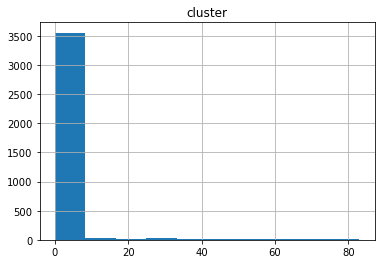

In [56]:
#estrazione e plot cluster betweenness (sono tutti dello stesso cluster)
clusters_betweenness=pd.DataFrame(betweenness._membership,columns=["cluster"])
clusters_betweenness.hist()

Eigen Vector

In [53]:
#il minor numero di cluster con l'eigen è 84
eigen=g.community_leading_eigenvector(clusters=500)
eigen.summary()

C:\ProgramData\Anaconda3\lib\site-packages\igraph\__init__.py:1281: RuntimeWarning: This method was developed for undirected graphs at src/community/leading_eigenvector.c:530
  membership, _, q = GraphBase.community_leading_eigenvector(


'Clustering with 3735 elements and 119 clusters'

array([[<AxesSubplot:title={'center':'cluster'}>]], dtype=object)

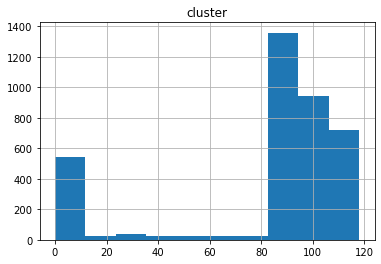

In [44]:
#estrazione e plot cluster betweenness
clusters_eigen=pd.DataFrame(eigen._membership,columns=["cluster"])
clusters_eigen.hist()

In [60]:
nodes["eigen"]=clusters_eigen

In [62]:
nodes.head(20)

,Id,Label,Interval,Colour,eigen
0,321228288,marsion65,NaN,#fb1239,0
1,1426639026824564737,MaurizioCimino2,NaN,#fb1239,1
2,272945830,AleC226,NaN,#fb1239,1
3,745351426117869568,Massimi8900,NaN,#fb1239,84
4,798461063494828032,IvanoPioli,NaN,#fb1239,87
5,1053632622465818624,Efisio31251859,NaN,#fb1239,1
6,1429231388394467332,Ilaria89965081,NaN,#fb1239,1
7,1000480351905632258,MarceVann,NaN,#fb1239,1
8,2187420112,brughen,NaN,#fb1239,98
9,2175541491,47187297Bruna,NaN,#fb1239,99


In [52]:
clusters_eigen.groupby("cluster")["cluster"].sum()

cluster
0          0
1        507
2         16
3          6
4          8
       ...  
114     5700
115      690
116    12992
117     1287
118    22184
Name: cluster, Length: 119, dtype: int64

In [64]:
nodes.to_csv('nodes_eigen.csv', index=False)

In [13]:
#creo colonna per i cluster
nodes["cluster"]=membership
nodes.head()

,Id,Label,Interval,Colour,cluster
0,321228288,marsion65,NaN,#fb1239,0
1,1426639026824564737,MaurizioCimino2,NaN,#fb1239,1
2,272945830,AleC226,NaN,#fb1239,1
3,745351426117869568,Massimi8900,NaN,#fb1239,1
4,798461063494828032,IvanoPioli,NaN,#fb1239,1


What about controlling the number of clusters? As you know, the leading_eigenvalue method has a clusters parameter for the desired number of clusters, but it's apparently more a guideline than an actual rule: giving clusters=3 results in just 1 cluster with your data, and 2 clusters with mine.

You can get more precise control of the number of clusters with a method which returns a VertexDendrogram instead of a Clustering, such as `community_edge_betweenness.

com3 = graph2.community_edge_betweenness(clusters=3, directed=False, weights="weight")

To get a clustering with n clusters, you call com3.as_clustering(n), which gave exactly n clusters for all my tests.